### 회귀로 결측치 채우기

classification, regression -> 지도학습
clustering, dimentionality reduction(차원축소) -> 비지도학습

classification: 카테고리 데이터로 답을 정할 때
    regression: 수치예측

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('./diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
(df['Insulin']>0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [5]:
train=df[df['Insulin']>0].copy()
train.shape

(394, 9)

In [6]:
test=df[df['Insulin']==0].copy()
test.shape

(374, 9)

In [7]:
feature_names=test.columns.tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
feature_names.remove('Insulin')

In [9]:
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [10]:
label_name='Insulin'
label_name

'Insulin'

In [11]:
X_train=train[feature_names]
X_train.shape

(394, 8)

In [12]:
y_train=train[label_name]
y_train.shape

(394,)

In [13]:
X_test=test[feature_names]
X_test.shape

(374, 8)

In [14]:
y_test=test[label_name]
y_test.shape

(374,)

# -----

In [15]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(random_state=42)

In [16]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [17]:
# cross validation으로 오차 측정하기

from sklearn.model_selection import cross_val_predict

cross_val_predict?

In [18]:
y_predict=cross_val_predict(model,X_train,y_train,cv=5,verbose=2,n_jobs=-1)
y_predict

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished


array([ 25., 480.,  55., 145., 495., 130., 220., 285., 176., 155., 237.,
       120.,  56., 415., 185.,  25.,  99., 215., 265., 210.,  90., 265.,
        59., 495., 125., 277., 220.,  94., 180.,  44., 115.,  86., 135.,
       291., 115.,  75., 100., 480.,  78.,  57., 180., 155.,  15.,  54.,
       220., 115., 330., 122.,  66.,  84., 168., 231.,  32., 194.,  58.,
       579.,  75.,  54., 106., 120., 106.,  96., 321.,  49., 318.,  70.,
        87., 152., 158., 291.,  99., 145., 231., 167., 100., 165.,  25.,
       210., 190., 150., 110.,  87., 293.,  66.,  49., 342., 100.,  89.,
        49., 846., 110., 192., 204., 130., 235., 182., 191., 166.,  49.,
       105., 207., 115., 250.,  74., 140., 215., 152., 167., 215.,  71.,
        56., 249., 120., 540.,  43.,  37., 207., 210., 130., 465., 310.,
       146.,  40., 190., 392., 237., 200., 190., 142.,  60., 110.,  89.,
       182., 144., 495., 600., 235., 150.,  86., 200., 125., 176., 210.,
       250., 293.,  79., 152.,  46., 291.,  48.,  7

In [19]:
# 정답을 정확하게 맞춘 갯수
(y_predict==y_train).sum()

3

<AxesSubplot:xlabel='Insulin'>

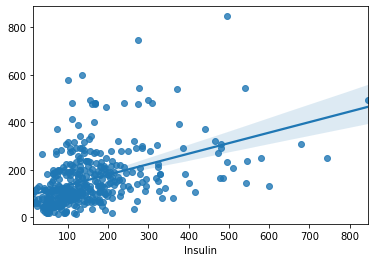

In [20]:
sns.regplot(y_train,y_predict)

In [21]:
# r2_score 구하기

from sklearn.metrics import r2_score

r2_score(y_train,y_predict)
# 1에 가까워야 정확도가 높은 것임

-0.14429295602725567

<AxesSubplot:xlabel='Insulin'>

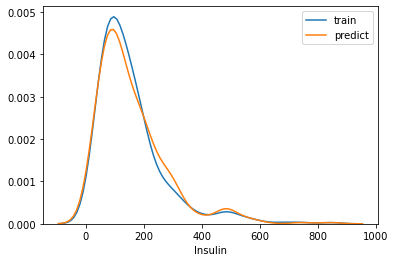

In [22]:
# distplot으로 정답값과 예측값의 분포 그리기

sns.distplot(y_train,hist=False,label='train')
sns.distplot(y_predict,hist=False,label='predict')

# -----

In [23]:
# 오차 구하기 - MAE

abs(y_train-y_predict).mean()

86.57106598984771

<AxesSubplot:xlabel='Insulin'>

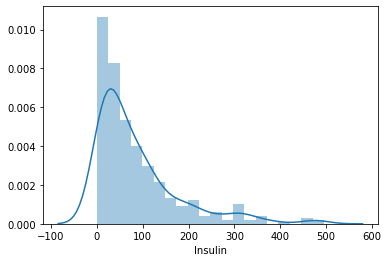

In [24]:
error=abs(y_train-y_predict)
sns.distplot(error)

In [25]:
# 오차 구하기 - RMSE

np.sqrt(((y_train-y_predict)**2).mean())

126.89512636995443

# -----

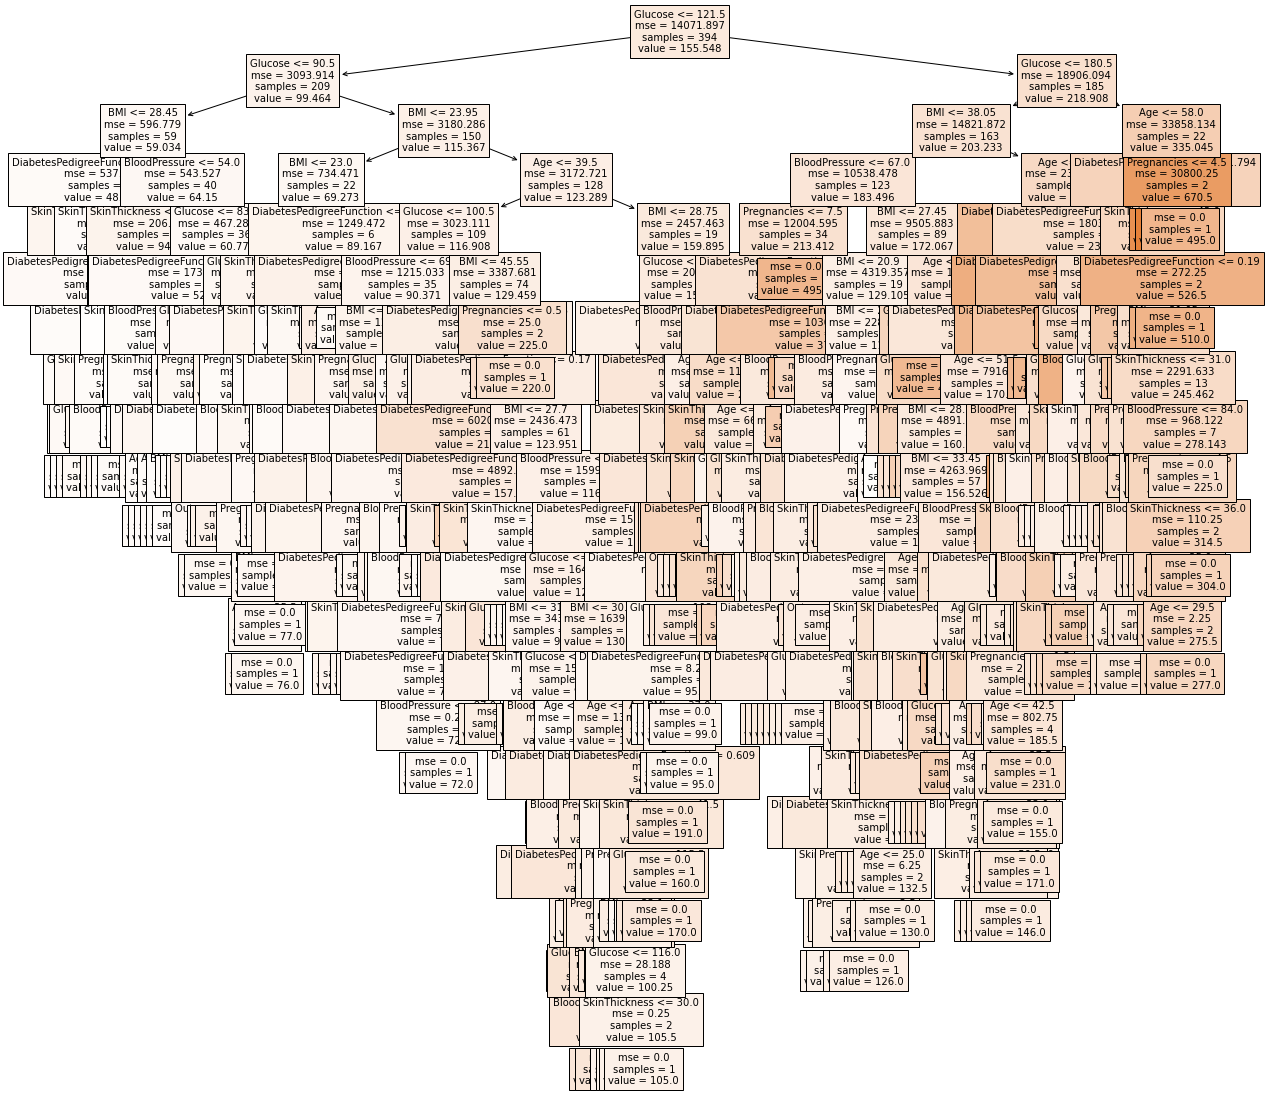

In [26]:
# 의사결정나무 시각화

from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree=plot_tree(model,feature_names=feature_names,filled=True,fontsize=10)

In [27]:
# feature의 중요도 추출
model.feature_importances_

array([4.20201517e-02, 4.08219914e-01, 6.24932543e-02, 5.97519119e-02,
       1.10296456e-01, 1.63917473e-01, 1.52984660e-01, 3.16179009e-04])

<AxesSubplot:>

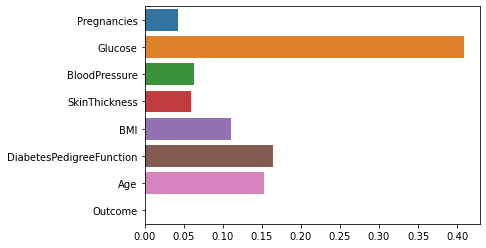

In [28]:
sns.barplot(x=model.feature_importances_,y=feature_names)

In [29]:
y_test=model.predict(X_test)
y_test[:5]

array([168.,  37., 145.,  36., 182.])

# -----

In [30]:
# 예측의 결과값 분석

train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [31]:
test['Insulin']=y_test

In [32]:
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,133.161017,102.224032,15.0,64.0,99.5,158.25,600.0
1,138.0,212.434783,141.952236,44.0,115.0,176.0,267.00,846.0


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

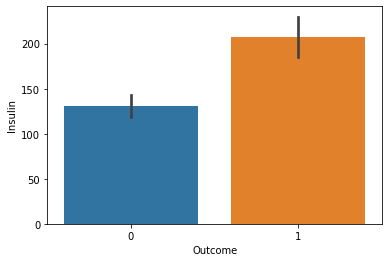

In [33]:
sns.barplot(data=train,x='Outcome',y='Insulin')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

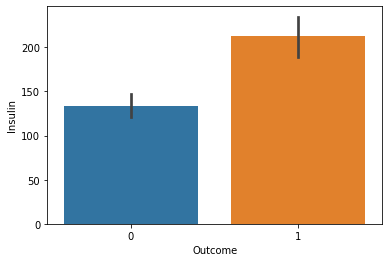

In [34]:
sns.barplot(data=test,x='Outcome',y='Insulin')

# -----

<AxesSubplot:xlabel='Insulin'>

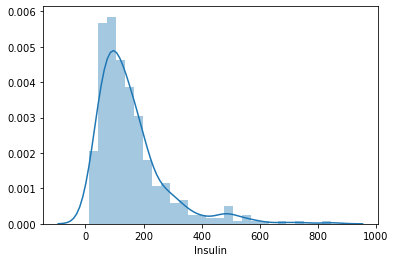

In [36]:
# 예측의 오차값 줄이기

### EDA

sns.distplot(train['Insulin'])

<AxesSubplot:xlabel='Insulin'>

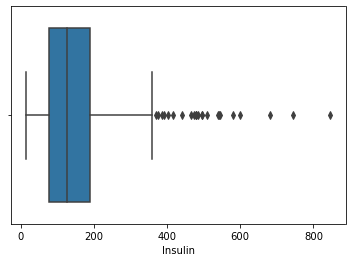

In [38]:
sns.boxplot(train['Insulin'])

In [41]:
desc=train['Insulin'].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [42]:
# IQR = 3IQR + 1IQR
# outlier > 3IQR + (1IQR * 1.5)

IQR=desc.loc['75%']-desc.loc['25%']
OUT=desc.loc['75%'] + (IQR * 1.5)

In [43]:
train[train['Insulin']>OUT].shape
# outlier의 갯수는 24개

(24, 9)

In [44]:
# 위에서 구한 outlier모두 제외아닌 600이상을 제외할 것임
print(train.shape)
train=train[train['Insulin']<600]
print(train.shape)

(394, 9)
(390, 9)


In [45]:
feature_names=test.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [46]:
label_name='Insulin'
label_name

'Insulin'

In [47]:
X_train=train[feature_names]
X_train.shape

(390, 8)

In [48]:
y_train=train[label_name]
y_train.shape

(390,)

In [49]:
X_test=test[feature_names]
X_test.shape

(374, 8)

In [50]:
y_test=test[label_name]
y_test.shape

(374,)

In [51]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(random_state=42)

In [52]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [53]:
from sklearn.model_selection import cross_val_predict

y_predict=cross_val_predict(model,X_train,y_train,cv=5,verbose=2,n_jobs=-1)
y_predict

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished


array([ 25., 182.,  55.,  67., 135., 220., 285., 165., 158., 144., 402.,
        58., 285., 330.,  25., 114., 205., 115., 130.,  58., 265.,  59.,
       495., 190., 231., 220.,  78., 135.,  41., 474.,  81., 135.,  61.,
       115.,  99.,  94., 130., 200.,  57., 185.,  88.,  15.,  88., 220.,
       115., 182., 194.,  66.,  92., 474., 194.,  32., 194.,  58.,  14.,
        94.,  54., 170., 106., 180., 144., 135.,  41., 100., 265.,  76.,
       140.,  94., 120., 176., 160., 150., 480.,  88., 152.,  25., 140.,
       105., 135., 105.,  50., 167.,  66.,  49.,  90., 145., 106.,  49.,
       159., 155., 230., 155.,  77., 140., 182., 192., 284.,  49., 105.,
       207.,  92., 167., 145., 110., 235.,  22., 180., 140., 140.,  56.,
       135., 180.,  43.,  37., 225., 210., 135., 245., 100.,  40., 215.,
        83., 155., 200., 215., 140.,  60., 100., 120., 182., 126., 228.,
        60., 210., 230.,  49., 235., 125., 140., 293., 250., 167., 127.,
       188., 105., 284.,  48.,  95., 170., 415., 33

In [54]:
(y_predict==y_train).sum()

5

<AxesSubplot:xlabel='Insulin'>

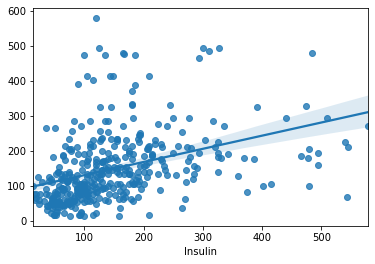

In [55]:
sns.regplot(y_train,y_predict)

In [56]:
from sklearn.metrics import r2_score

r2_score(y_train,y_predict)

-0.1981991324875707

<AxesSubplot:xlabel='Insulin'>

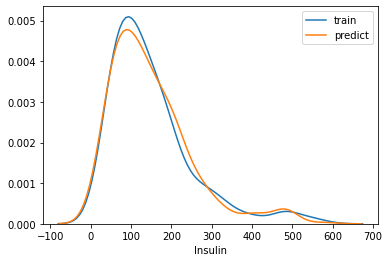

In [57]:
sns.distplot(y_train,hist=False,label='train')
sns.distplot(y_predict,hist=False,label='predict')

In [58]:
# 오차 구하기 - MAE

abs(y_train-y_predict).mean()
# 86 -> 77

77.55128205128206

<AxesSubplot:xlabel='Insulin'>

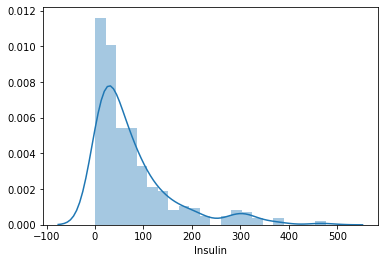

In [59]:
error=abs(y_train-y_predict)
sns.distplot(error)

In [60]:
# 오차 구하기 - RMSE

np.sqrt(((y_train-y_predict)**2).mean())
# 126 -> 114

114.07729048819579

In [61]:
# 이번에는 outlier > 600이 아닌 outlier > OUT
print(train.shape)
train=train[train['Insulin']<OUT]
print(train.shape)

(390, 9)
(370, 9)


In [62]:
feature_names=test.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [63]:
label_name='Insulin'
label_name

'Insulin'

In [64]:
X_train=train[feature_names]
X_train.shape

(370, 8)

In [65]:
y_train=train[label_name]
y_train.shape

(370,)

In [66]:
X_test=test[feature_names]
X_test.shape

(374, 8)

In [67]:
y_test=test[label_name]
y_test.shape

(374,)

In [68]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(random_state=42)

In [69]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [70]:
from sklearn.model_selection import cross_val_predict

y_predict=cross_val_predict(model,X_train,y_train,cv=5,verbose=2,n_jobs=-1)
y_predict

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([ 25., 182.,  55., 144., 220.,  83., 176., 310.,  90., 120.,  56.,
        29., 120.,  25., 130., 190., 105., 207.,  90., 265.,  59., 285.,
       168., 231.,  78., 105., 170.,  44., 168.,  99., 160.,  61., 115.,
        82.,  18., 231., 230.,  57.,  96., 180.,  15., 165.,  14., 115.,
       170., 130.,  66.,  74., 168.,  32., 194.,  58.,  14.,  82.,  54.,
       140.,  71., 165., 144., 293.,  49., 125., 105., 178.,  18., 165.,
       105., 135.,  14., 150., 100., 100.,  25., 140., 191., 150.,  87.,
       110., 140.,  66.,  49.,  70., 145.,  82.,  49., 167., 152., 175.,
       230., 210., 182., 207., 105.,  49., 105., 325., 115., 250.,  74.,
       144., 207., 115., 140.,  70.,  56., 120.,  43.,  37., 180., 210.,
       158., 145.,  40., 180., 171., 274., 190., 120.,  60., 230.,  82.,
       182., 130., 166.,  22., 150.,  86., 191., 125., 176., 168., 204.,
       140., 127., 176.,  90., 175.,  48.,  74., 175., 291., 171., 171.,
        82., 183.,  50.,  63.,  74., 285., 135., 15

In [71]:
(y_predict==y_train).sum()

7

<AxesSubplot:xlabel='Insulin'>

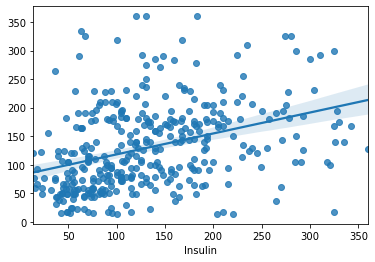

In [72]:
sns.regplot(y_train,y_predict)

In [73]:
from sklearn.metrics import r2_score

r2_score(y_train,y_predict)

-0.28551906710833275

<AxesSubplot:xlabel='Insulin'>

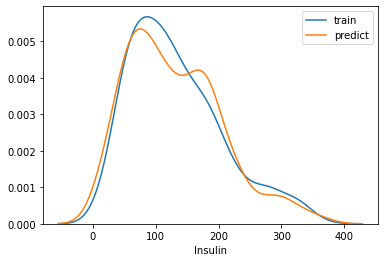

In [74]:
sns.distplot(y_train,hist=False,label='train')
sns.distplot(y_predict,hist=False,label='predict')

In [75]:
# 오차 구하기 - MAE

abs(y_train-y_predict).mean()
# 86 -> 77 -> 62

62.056756756756755

<AxesSubplot:xlabel='Insulin'>

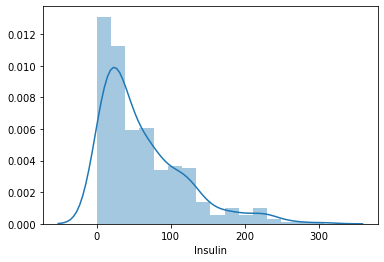

In [76]:
error=abs(y_train-y_predict)
sns.distplot(error)

In [77]:
# 오차 구하기 - RMSE

np.sqrt(((y_train-y_predict)**2).mean())
# 126 -> 114 -> 84

84.11142866717003

# ------

In [78]:
max_depth = np.random.randint(5,30,10)
max_depth

array([17, 20, 20, 16, 20, 14, 14, 11, 29,  6])

In [79]:
max_features = np.random.uniform(0.3,1.0,10)
max_features

array([0.89184359, 0.75889654, 0.59868299, 0.38174135, 0.94103062,
       0.83638409, 0.59487564, 0.83388051, 0.92715925, 0.79417588])

In [82]:
# 랜덤서치로 최적의 파라미터 찾기

from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'max_depth':max_depth,
                    'max_features': max_features}

regressor = RandomizedSearchCV(model,
                  param_distributions=param_distributions,
                  n_iter=10,
                  scoring=None,
                  n_jobs=None,
                  cv=5,
                  verbose=2,
                  random_state=42)

regressor.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=0.3817413528552671, max_depth=29 ...................
[CV] .... max_features=0.3817413528552671, max_depth=29, total=   0.0s
[CV] max_features=0.3817413528552671, max_depth=29 ...................
[CV] .... max_features=0.3817413528552671, max_depth=29, total=   0.0s
[CV] max_features=0.3817413528552671, max_depth=29 ...................
[CV] .... max_features=0.3817413528552671, max_depth=29, total=   0.0s
[CV] max_features=0.3817413528552671, max_depth=29 ...................
[CV] .... max_features=0.3817413528552671, max_depth=29, total=   0.0s
[CV] max_features=0.3817413528552671, max_depth=29 ...................
[CV] .... max_features=0.3817413528552671, max_depth=29, total=   0.0s
[CV] max_features=0.3817413528552671, max_depth=14 ...................
[CV] .... max_features=0.3817413528552671, max_depth=14, total=   0.0s
[CV] max_features=0.3817413528552671, max_depth=14 ...................
[CV] .... max_fe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] .... max_features=0.8363840903501596, max_depth=20, total=   0.0s
[CV] max_features=0.8363840903501596, max_depth=20 ...................
[CV] .... max_features=0.8363840903501596, max_depth=20, total=   0.0s
[CV] max_features=0.9410306162693935, max_depth=20 ...................
[CV] .... max_features=0.9410306162693935, max_depth=20, total=   0.0s
[CV] max_features=0.9410306162693935, max_depth=20 ...................
[CV] .... max_features=0.9410306162693935, max_depth=20, total=   0.0s
[CV] max_features=0.9410306162693935, max_depth=20 ...................
[CV] .... max_features=0.9410306162693935, max_depth=20, total=   0.0s
[CV] max_features=0.9410306162693935, max_depth=20 ...................
[CV] .... max_features=0.9410306162693935, max_depth=20, total=   0.0s
[CV] max_features=0.9410306162693935, max_depth=20 ...................
[CV] .... max_features=0.9410306162693935, max_depth=20, total=   0.0s
[CV] max_features=0.7941758849968913, max_depth=16 ...................
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': array([17, 20, 20, 16, 20, 14, 14, 11, 29,  6]),
                                        'max_features': array([0.89184359, 0.75889654, 0.59868299, 0.38174135, 0.94103062,
       0.83638409, 0.59487564, 0.83388051, 0.92715925, 0.79417588])},
                   random_state=42, verbose=2)

In [84]:
regressor.best_params_

{'max_features': 0.9410306162693935, 'max_depth': 20}

In [85]:
regressor.best_estimator_

DecisionTreeRegressor(max_depth=20, max_features=0.9410306162693935,
                      random_state=42)

In [86]:
regressor.best_score_

-0.11144224592532744

In [87]:
regressor.cv_results_

{'mean_fit_time': array([0.00598035, 0.00656257, 0.00518622, 0.00678163, 0.00608673,
        0.00701056, 0.00717964, 0.00598197, 0.00987744, 0.00596485]),
 'std_fit_time': array([0.00167288, 0.00195654, 0.00039857, 0.00171591, 0.00091491,
        0.00060706, 0.00132566, 0.0016699 , 0.00348795, 0.00179475]),
 'mean_score_time': array([0.00319104, 0.00358996, 0.00281973, 0.00319271, 0.00259223,
        0.00397525, 0.00319257, 0.00270391, 0.00319004, 0.0027935 ]),
 'std_score_time': array([0.00116355, 0.00135275, 0.00041488, 0.00097664, 0.00101727,
        0.00108003, 0.00146434, 0.00039333, 0.00074464, 0.00097756]),
 'param_max_features': masked_array(data=[0.3817413528552671, 0.3817413528552671,
                    0.8918435910769296, 0.8363840903501596,
                    0.9410306162693935, 0.7941758849968913,
                    0.5986829947943514, 0.8918435910769296,
                    0.8918435910769296, 0.8918435910769296],
              mask=[False, False, False, False, False, 

# -----

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

estimators={DecisionTreeRegressor(random_state=42),
      RandomForestRegressor(random_state=42),
      GradientBoostingRegressor(random_state=42)}
estimators

{DecisionTreeRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42),
 RandomForestRegressor(random_state=42)}

In [90]:
results=[]

for estimator in estimators:
    result=[]
    
    max_depth = np.random.randint(5,30,10)
    max_features=np.random.uniform(0.3,1.0,10)
    
    param_distributions = {'max_depth':max_depth,
                    'max_features': max_features}

    regressor = RandomizedSearchCV(estimator,
                  param_distributions=param_distributions,
                  n_iter=10,
                  scoring=None,
                  n_jobs=None,
                  cv=5,
                  verbose=2,
                  random_state=42)

    regressor.fit(X_train,y_train)
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=0.5927132796368113, max_depth=10 ...................
[CV] .... max_features=0.5927132796368113, max_depth=10, total=   0.0s
[CV] max_features=0.5927132796368113, max_depth=10 ...................
[CV] .... max_features=0.5927132796368113, max_depth=10, total=   0.0s
[CV] max_features=0.5927132796368113, max_depth=10 ...................
[CV] .... max_features=0.5927132796368113, max_depth=10, total=   0.0s
[CV] max_features=0.5927132796368113, max_depth=10 ...................
[CV] .... max_features=0.5927132796368113, max_depth=10, total=   0.0s
[CV] max_features=0.5927132796368113, max_depth=10 ...................
[CV] .... max_features=0.5927132796368113, max_depth=10, total=   0.0s
[CV] max_features=0.5927132796368113, max_depth=8 ....................
[CV] ..... max_features=0.5927132796368113, max_depth=8, total=   0.0s
[CV] max_features=0.5927132796368113, max_depth=8 ....................
[CV] ..... max_f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_features=0.9880224731398641, max_depth=29 ...................
[CV] .... max_features=0.9880224731398641, max_depth=29, total=   0.0s
[CV] max_features=0.9880224731398641, max_depth=29 ...................
[CV] .... max_features=0.9880224731398641, max_depth=29, total=   0.0s
[CV] max_features=0.9880224731398641, max_depth=29 ...................
[CV] .... max_features=0.9880224731398641, max_depth=29, total=   0.0s
[CV] max_features=0.740085002652925, max_depth=29 ....................
[CV] ..... max_features=0.740085002652925, max_depth=29, total=   0.0s
[CV] max_features=0.740085002652925, max_depth=29 ....................
[CV] ..... max_features=0.740085002652925, max_depth=29, total=   0.0s
[CV] max_features=0.740085002652925, max_depth=29 ....................
[CV] ..... max_features=0.740085002652925, max_depth=29, total=   0.0s
[CV] max_features=0.740085002652925, max_depth=29 ....................
[CV] ..... max_features=0.740085002652925, max_depth=29, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_features=0.5808617930389819, max_depth=13, total=   0.3s
[CV] max_features=0.5808617930389819, max_depth=13 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... max_features=0.5808617930389819, max_depth=13, total=   0.2s
[CV] max_features=0.5808617930389819, max_depth=13 ...................
[CV] .... max_features=0.5808617930389819, max_depth=13, total=   0.3s
[CV] max_features=0.5808617930389819, max_depth=13 ...................
[CV] .... max_features=0.5808617930389819, max_depth=13, total=   0.2s
[CV] max_features=0.5808617930389819, max_depth=13 ...................
[CV] .... max_features=0.5808617930389819, max_depth=13, total=   0.2s
[CV] max_features=0.5808617930389819, max_depth=17 ...................
[CV] .... max_features=0.5808617930389819, max_depth=17, total=   0.3s
[CV] max_features=0.5808617930389819, max_depth=17 ...................
[CV] .... max_features=0.5808617930389819, max_depth=17, total=   0.3s
[CV] max_features=0.5808617930389819, max_depth=17 ...................
[CV] .... max_features=0.5808617930389819, max_depth=17, total=   0.2s
[CV] max_features=0.5808617930389819, max_depth=17 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=0.5741518787516062, max_depth=26 ...................
[CV] .... max_features=0.5741518787516062, max_depth=26, total=   0.2s
[CV] max_features=0.5741518787516062, max_depth=26 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... max_features=0.5741518787516062, max_depth=26, total=   0.1s
[CV] max_features=0.5741518787516062, max_depth=26 ...................
[CV] .... max_features=0.5741518787516062, max_depth=26, total=   0.1s
[CV] max_features=0.5741518787516062, max_depth=26 ...................
[CV] .... max_features=0.5741518787516062, max_depth=26, total=   0.2s
[CV] max_features=0.5741518787516062, max_depth=26 ...................
[CV] .... max_features=0.5741518787516062, max_depth=26, total=   0.1s
[CV] max_features=0.5741518787516062, max_depth=17 ...................
[CV] .... max_features=0.5741518787516062, max_depth=17, total=   0.2s
[CV] max_features=0.5741518787516062, max_depth=17 ...................
[CV] .... max_features=0.5741518787516062, max_depth=17, total=   0.1s
[CV] max_features=0.5741518787516062, max_depth=17 ...................
[CV] .... max_features=0.5741518787516062, max_depth=17, total=   0.1s
[CV] max_features=0.5741518787516062, max_depth=17 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.3s finished


In [92]:
df_cv=pd.DataFrame(results)
df_cv.columns=['model','params','estimator','r2_score','cv_result']
df_cv

,model,params,estimator,r2_score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.5927132796368113, 'max_dept...","DecisionTreeRegressor(max_depth=8, max_feature...",-0.059085,"{'mean_fit_time': [0.0069811344146728516, 0.00..."
1,RandomForestRegressor,"{'max_features': 0.6593091031580329, 'max_dept...","(DecisionTreeRegressor(max_depth=6, max_featur...",0.346802,"{'mean_fit_time': [0.23927230834960939, 0.2533..."
2,GradientBoostingRegressor,"{'max_features': 0.9552332533648484, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.295979,"{'mean_fit_time': [0.1472032070159912, 0.14257..."


In [93]:
# best_estimator로 다시 train
best_estimator=df_cv.loc[1,'estimator']
best_estimator

RandomForestRegressor(max_depth=6, max_features=0.6593091031580329,
                      random_state=42)

In [94]:
best_estimator.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, max_features=0.6593091031580329,
                      random_state=42)

In [96]:
from sklearn.model_selection import cross_val_predict

y_predict=cross_val_predict(best_estimator,X_train,y_train,cv=5,verbose=2,n_jobs=-1)
y_predict

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


array([ 54.85330135, 170.94218384,  91.07336273, 144.73450377,
       173.16037036, 129.714799  , 151.58460296, 156.20656218,
       161.74259387, 140.08548091,  71.69178632, 163.85695855,
       183.1902505 ,  58.15346406, 135.98631963, 164.41372218,
       170.60380715, 184.54853115, 109.8451254 , 132.95978452,
        62.18934131, 210.32909823, 174.29081415, 226.5815307 ,
       114.1601761 , 130.38405583, 178.39258045,  66.3382414 ,
       167.77536015, 129.58557371, 161.47616957, 160.61099457,
        64.93048114, 130.35915697, 107.53211581, 177.42999406,
       127.31305455,  81.97977955, 157.28840536, 155.21363565,
        43.46685227,  89.71540918, 161.42872281,  62.9698924 ,
       152.41940044, 171.39077172,  72.93215942, 124.51338797,
       181.65761116,  70.16434537, 176.25451227,  67.54012044,
       170.7997575 , 124.59637932, 110.14670178, 143.74586214,
       122.48362252, 146.78832467, 161.52737813, 203.99377296,
        68.08378943, 144.98787845,  95.76535329,  84.17

In [97]:
(y_predict==y_train).sum()

0

<AxesSubplot:xlabel='Insulin'>

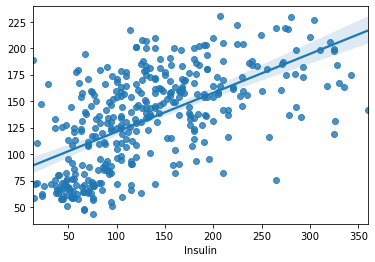

In [98]:
sns.regplot(y_train,y_predict)

In [99]:
from sklearn.metrics import r2_score

r2_score(y_train,y_predict)

0.3590582382944605

<AxesSubplot:xlabel='Insulin'>

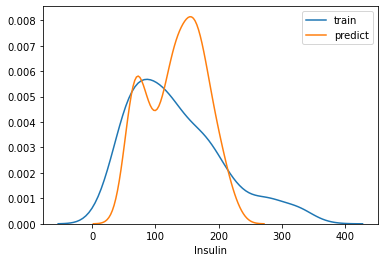

In [100]:
sns.distplot(y_train,hist=False,label='train')
sns.distplot(y_predict,hist=False,label='predict')

In [101]:
# 오차 구하기 - MAE

abs(y_train-y_predict).mean()
# 86 -> 77 -> 62 -> 44

44.055853912436184

<AxesSubplot:xlabel='Insulin'>

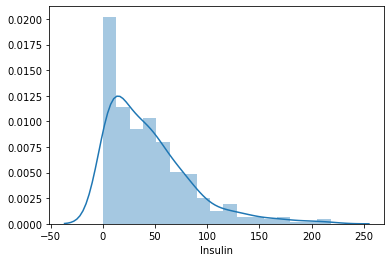

In [102]:
error=abs(y_train-y_predict)
sns.distplot(error)

In [103]:
# 오차 구하기 - RMSE

np.sqrt(((y_train-y_predict)**2).mean())
# 126 -> 114 -> 84 -> 59

59.391601098228854

In [104]:
best_estimator.feature_importances_

array([0.03259473, 0.4821477 , 0.05181559, 0.07811856, 0.1173996 ,
       0.08845975, 0.09899999, 0.05046408])

<AxesSubplot:>

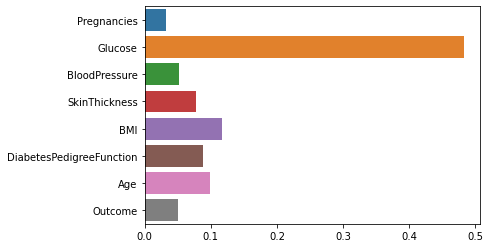

In [105]:
sns.barplot(x=best_estimator.feature_importances_,y=feature_names)

In [106]:
y_test=best_estimator.predict(X_test)
y_test

array([186.46941716,  58.63397454, 189.12541811, 139.6808322 ,
       161.54815704, 164.44747532, 172.05105368, 187.51771256,
       193.95246058, 127.20181751, 139.85962226, 147.23094351,
       209.16913554, 130.21303739, 197.21592817, 151.55675751,
       164.4393151 , 105.1293514 , 116.73356646, 161.51946712,
       147.23148937, 104.55782691, 188.77803559, 110.8570133 ,
       170.39155424, 186.42626227, 184.22510394,  55.42654957,
       141.17392907, 124.69584598,  64.58214131, 204.01417432,
        85.90574232, 152.81326706,  91.78264751, 154.75309809,
        80.83622886, 148.19013514, 180.2255502 , 172.0930402 ,
        55.32341127,  59.3606855 ,  97.08434067,  88.49108113,
       179.23005892, 109.38013145, 106.86072748,  86.31076886,
       108.38894328, 185.42124095, 149.35040016, 110.4601071 ,
        78.54684814, 208.10257972,  85.22372951, 193.12084555,
       178.54355578, 147.83495047, 123.99743816, 103.77781006,
        92.73764556, 235.45458928, 153.57349579,  96.95

In [107]:
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [108]:
test['Insulin']=y_test

In [109]:
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,131.214565,40.889579,55.142117,96.020746,136.691759,163.722273,225.607853
1,138.0,169.795006,28.789807,95.007078,150.782953,171.083539,190.809340,247.810503


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

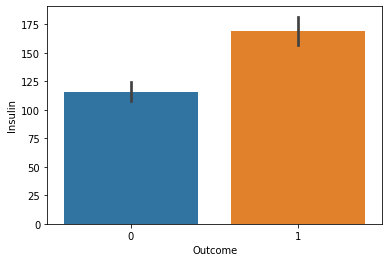

In [110]:
sns.barplot(data=train,x='Outcome',y='Insulin')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

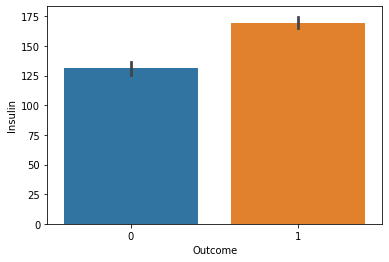

In [111]:
sns.barplot(data=test,x='Outcome',y='Insulin')

# -----

In [112]:
df[df['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [113]:
test['Insulin']

0      186.469417
1       58.633975
2      189.125418
5      139.680832
7      161.548157
          ...    
761    191.016314
762     93.478158
764    155.038392
766    155.710002
767     77.756895
Name: Insulin, Length: 374, dtype: float64

In [114]:
# Insulin값 채워주기
df.loc[df['Insulin']==0,'Insulin'] = test['Insulin']

In [115]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,186.469417,33.6,0.627,50,1
1,1,85,66,29,58.633975,26.6,0.351,31,0
2,8,183,64,0,189.125418,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,155.038392,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,155.710002,30.1,0.349,47,1


In [117]:
df.to_csv('./diabetes_fill_insulin.csv',index=False)

In [118]:
pd.read_csv('./diabetes_fill_insulin.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,186.469417,33.6,0.627,50,1
1,1,85,66,29,58.633975,26.6,0.351,31,0
2,8,183,64,0,189.125418,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,155.038392,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,155.710002,30.1,0.349,47,1


# -----

In [119]:
# 회귀로 결측치 채운 데이터를 분류에 사용하기

df_insulin=pd.read_csv('./diabetes_fill_insulin.csv')
df_insulin.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,186.469417,33.6,0.627,50,1
1,1,85,66,29,58.633975,26.6,0.351,31,0
2,8,183,64,0,189.125418,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1


In [122]:
df=pd.read_csv('./diabetes_feature.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_Insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,102.5,4.639572,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,169.5,5.138735,False
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,102.5,4.639572,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


In [123]:
df['Insulin']=df_insulin['Insulin']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_Insulin
0,6,0.848324,72,35,186.469417,33.6,0.468492,50,1,False,False,True,False,102.5,4.639572,False
1,1,-1.123396,66,29,58.633975,26.6,-0.365061,31,0,False,False,True,False,169.5,5.138735,False
2,8,1.943724,64,0,189.125418,23.3,0.604397,32,1,True,False,True,False,102.5,4.639572,False
3,1,-0.998208,66,23,94.000000,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168.000000,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


In [124]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_Insulin'],
      dtype='object')

In [125]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin']]
X.shape

(768, 8)

In [126]:
y=df['Outcome']
y.shape

(768,)

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [128]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
             RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42)
            ]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [130]:
max_depth = np.random.randint(2, 20, 10)
max_depth

array([11, 12, 18,  8,  7,  4,  2,  5,  7,  4])

In [131]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.63799295, 0.34433967, 0.76140571, 0.94881081, 0.87298408,
       0.78723139, 0.64709374, 0.85996833, 0.42619879, 0.42603343])

In [132]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)
        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.7min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.3min finished


In [133]:
df = pd.DataFrame(results, 
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
df

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.9032803721479563, 'max_dept...",0.768706,0.733766,"{'mean_fit_time': [0.014159202575683594, 0.018..."
1,RandomForestClassifier,"{'n_estimators': 142, 'max_features': 0.648264...",0.793203,0.727273,"{'mean_fit_time': [0.6683501720428466, 0.69072..."
2,GradientBoostingClassifier,"{'n_estimators': 112, 'max_features': 0.417800...",0.788298,0.766234,"{'mean_fit_time': [1.9269803047180176, 2.02902..."


In [134]:
pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.671310,0.073045,0.034890,0.009702,142,0.648265,5,"{'n_estimators': 142, 'max_features': 0.648264...",0.813008,0.837398,0.756098,0.739837,0.819672,0.793203,0.038133,1
58,0.622775,0.022926,0.030951,0.004309,123,0.943589,17,"{'n_estimators': 123, 'max_features': 0.943589...",0.813008,0.837398,0.772358,0.731707,0.811475,0.793189,0.037137,2
4,0.755520,0.127816,0.059576,0.054371,172,0.4178,7,"{'n_estimators': 172, 'max_features': 0.417800...",0.821138,0.837398,0.764228,0.731707,0.811475,0.793189,0.039214,2
34,0.624423,0.015170,0.032345,0.001829,149,0.648265,5,"{'n_estimators': 149, 'max_features': 0.648264...",0.821138,0.829268,0.747967,0.739837,0.819672,0.791577,0.039147,4
89,0.708773,0.016803,0.036339,0.005670,165,0.648265,5,"{'n_estimators': 165, 'max_features': 0.648264...",0.821138,0.829268,0.747967,0.739837,0.819672,0.791577,0.039147,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.722185,0.095060,0.067493,0.033887,123,0.343997,18,"{'n_estimators': 123, 'max_features': 0.343996...",0.764228,0.813008,0.747967,0.739837,0.811475,0.775303,0.031170,96
28,0.766403,0.059469,0.031611,0.004238,142,0.648265,14,"{'n_estimators': 142, 'max_features': 0.648264...",0.796748,0.821138,0.739837,0.715447,0.803279,0.775290,0.040457,97
16,0.924138,0.238365,0.035665,0.009599,149,0.648265,16,"{'n_estimators': 149, 'max_features': 0.648264...",0.796748,0.821138,0.723577,0.739837,0.795082,0.775277,0.037109,98
15,0.972209,0.075950,0.070258,0.019340,123,0.648265,16,"{'n_estimators': 123, 'max_features': 0.648264...",0.796748,0.829268,0.739837,0.715447,0.786885,0.773637,0.040824,99
